# Assignment 6: Apply NB

<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing for loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [29]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
# If you want to add more features, you can add. (This is purely optional, not mandatory)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from scipy.sparse import hstack
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics 
import seaborn as sns
import numpy as np

data = pd.read_csv('preprocessed_data.csv')
data.head(3)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [33]:
# write your code in following steps for task 1
# 1. Split your data.
# 2. Perform Bag of Words Vectorization of text data.
# 3. Perform tfidf vectorization of text data.
# 4. perform one-hot encoding of categorical features.  
# 5. perform normalization of numerical features 
# 6. For set 1 stack up all the features using hstack()
# 7. For set 2 stack up all the features using hstack()
# 8. Perform hyperparameter tuning and represent the training and cross-validation AUC scores for different 'alpha' values, using a 2D line plot.
# 9. Find the best hyperparameter 'alpha' and fit the model. Plot ROC-AUC curve(by obtaining the probabilities using 'predict proba' method)
# 10. Plot confusion matrix based on the best threshold value
# 11. Either for the model in set 1 or in set 2, print the top 20 features(you have to print the names, not the indexes) associated with the positive and negative classes each.
# 12. Summarize your observations and compare both the models(ie., from set 1 and set 2) in terms of optimal hyperparameter value, train AUC and test AUC scores. 
# 13. You can use Prettytable or any other tabular format for comparison.
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    

In [30]:
# Split the dataset 
# 1) If you want to apply simple cross-validation, split the dataset into 3 parts (ie., train, CV and test sets)
# 2) If you want to apply K-fold CV (or) GridSearch Cross Validation (or) Randomized Search Cross Validation, just split the dataset into 2 parts (ie., train and test sets)
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)


<h2>1.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [33]:
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Essay' 
vectorizer = CountVectorizer(min_df=10)
%time vectorizer.fit(X_train['essay'].values)   # fit function should be only on train data
%time X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
%time X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Title' (Optional)

Wall time: 7.75 s
Wall time: 7.38 s
Wall time: 3.16 s


In [34]:
words=vectorizer.get_feature_names()
len(words)

14440

In [35]:
# Apply TF-IDF vectorization on 'Preprocessed_Essay' 
vectorizer_0 = TfidfVectorizer(min_df=10)
%time vectorizer_0.fit(X_train['essay'].values)
%time text_tfidf_tr = vectorizer_0.transform(X_train['essay'].values)
%time text_tfidf_te = vectorizer_0.transform(X_test['essay'].values)
print("Shape of matrix after tfidf vector ",text_tfidf_tr.shape,text_tfidf_te.shape) 


# Apply TF-IDF vectorization on 'Preprocessed_Title' (Optional)


Wall time: 7.57 s
Wall time: 7.78 s
Wall time: 3.29 s
Shape of matrix after tfidf vector  (76473, 14440) (32775, 14440)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [36]:
# Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
vectorizer_1 = CountVectorizer()
vectorizer_1.fit(X_train['school_state'].values)
%time X_train_state = vectorizer_1.transform(X_train['school_state'].values)
%time X_test_state = vectorizer_1.transform(X_test['school_state'].values)
w1=vectorizer_1.get_feature_names()

vectorizer_1.fit(X_train['teacher_prefix'].values)
%time X_train_teacher = vectorizer_1.transform(X_train['teacher_prefix'].values)
%time X_test_teacher = vectorizer_1.transform(X_test['teacher_prefix'].values)
w2=vectorizer_1.get_feature_names()

vectorizer_1.fit(X_train['project_grade_category'].values)
%time X_train_grade = vectorizer_1.transform(X_train['project_grade_category'].values)
%time X_test_grade = vectorizer_1.transform(X_test['project_grade_category'].values)
w3=vectorizer_1.get_feature_names()

vectorizer_1.fit(X_train['clean_categories'].values)
%time X_train_categories = vectorizer_1.transform(X_train['clean_categories'].values)
%time X_test_categories = vectorizer_1.transform(X_test['clean_categories'].values)
w4=vectorizer_1.get_feature_names()

vectorizer_1.fit(X_train['clean_subcategories'].values)
%time X_train_subcate = vectorizer_1.transform(X_train['clean_subcategories'].values)
%time X_test_subcate = vectorizer_1.transform(X_test['clean_subcategories'].values)
w5=vectorizer_1.get_feature_names()

# Apply Normalization on the numerical features using Normalizer().

normalizer = Normalizer()
%time normalizer.fit(X_train['price'].values.reshape(-1,1))
%time X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
%time X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
%time X_train_num_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
%time X_test_num_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))


Wall time: 203 ms
Wall time: 85.8 ms
Wall time: 192 ms
Wall time: 97.7 ms
Wall time: 214 ms
Wall time: 95.7 ms
Wall time: 243 ms
Wall time: 103 ms
Wall time: 244 ms
Wall time: 115 ms
Wall time: 1.05 ms
Wall time: 974 µs
Wall time: 0 ns
Wall time: 1e+03 µs
Wall time: 1.01 ms


In [37]:
print(w1,w2,w3,w4,w5)
print(len(w1),len(w2),len(w3),len(w4),len(w5))

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy'] ['dr', 'mr', 'mrs', 'ms', 'teacher'] ['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2'] ['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth'] ['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts',

<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

#### Set 1

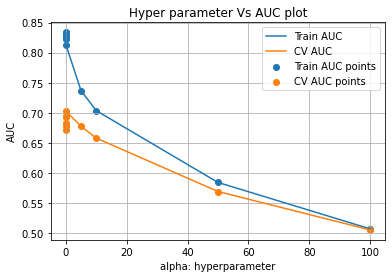

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
6,0.229719,0.010312,0.038564,0.000939,0.00001,{'alpha': 1e-05},0.671976,0.671423,0.669019,0.670806,0.001284,7,0.833040,0.834236,0.834652,0.833976,0.000683
9,0.204450,0.006666,0.035571,0.001696,0.0001,{'alpha': 0.0001},0.679216,0.678316,0.676103,0.677878,0.001308,5,0.831070,0.832283,0.832868,0.832074,0.000749
8,0.218749,0.007909,0.035572,0.002050,0.0005,{'alpha': 0.0005},0.685156,0.683807,0.681883,0.683615,0.001343,4,0.828848,0.830072,0.830841,0.829920,0.000821
7,0.198469,0.013455,0.039561,0.000470,0.005,{'alpha': 0.005},0.694407,0.691946,0.690747,0.692367,0.001523,3,0.823736,0.824981,0.826142,0.824953,0.000982
0,0.209104,0.003391,0.042553,0.000939,0.01,{'alpha': 0.01},0.697180,0.694319,0.693394,0.694964,0.001612,2,0.821561,0.822805,0.824127,0.822831,0.001048
5,0.205119,0.022007,0.043550,0.002619,0.1,{'alpha': 0.1},0.704973,0.701102,0.701013,0.702363,0.001846,1,0.810791,0.811984,0.813992,0.812256,0.001321
1,0.202457,0.009068,0.040891,0.001629,5,{'alpha': 5},0.676946,0.675382,0.679683,0.677337,0.001777,6,0.736188,0.736301,0.737771,0.736753,0.000721
3,0.217750,0.011115,0.045213,0.002488,10,{'alpha': 10},0.656173,0.656030,0.661070,0.657757,0.002343,8,0.703346,0.703450,0.703614,0.703470,0.000111
4,0.198801,0.007908,0.042220,0.001880,50,{'alpha': 50},0.569673,0.569187,0.567526,0.568795,0.000919,9,0.583724,0.583186,0.584786,0.583899,0.000665
2,0.185170,0.016455,0.040559,0.002489,100,{'alpha': 100},0.506066,0.504893,0.503549,0.504836,0.001028,10,0.506372,0.506157,0.507245,0.506591,0.000471


In [38]:
X_tr = hstack((X_train_essay_bow,X_train_state,X_train_teacher,X_train_grade,X_train_categories,X_train_subcate,X_train_price_norm,X_train_num_norm)).tocsr()
X_te = hstack((X_test_essay_bow,X_test_state,X_test_teacher,X_test_grade,X_test_categories,X_test_subcate,X_test_price_norm,X_test_num_norm)).tocsr()

# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot

nb = MultinomialNB(class_prior=[0.5,0.5])
parameters = {'alpha':[ 0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
clf = RandomizedSearchCV(nb, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']

plt.plot(alpha, train_auc, label='Train AUC')
plt.plot(alpha, cv_auc, label='CV AUC')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results


In [27]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.
#print(X_te.shape,X_tr.shape,tfidf_te.shape,tfidf_tr.shape)


(32775, 272269) (76473, 272269) (32775, 10444) (76473, 14564)


test=  0.6610658735131849
train=  0.7098294035679643


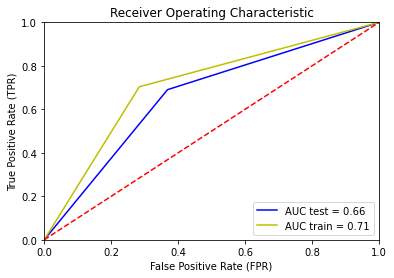

[2 1 0] [2 1 0]


In [41]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.
#https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

nb=MultinomialNB(alpha=0.5, class_prior=[0.5, 0.5], fit_prior=True)
nb.fit(X_tr, y_train)
y_pred_class_test = nb.predict(X_te)
print("test= ",metrics.roc_auc_score(y_test, y_pred_class_test))
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_class_test)
roc_auc_test = metrics.auc(fpr, tpr)

y_pred_class_train = nb.predict(X_tr)
print("train= ",metrics.roc_auc_score(y_train, y_pred_class_train))
fpr_1, tpr_1, threshold_1 = metrics.roc_curve(y_train, y_pred_class_train)
roc_auc_train = metrics.auc(fpr_1, tpr_1)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC test = %0.2f' % roc_auc_test)
plt.plot(fpr_1, tpr_1, 'y', label = 'AUC train = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.show()

print(threshold,threshold_1)


[[ 3135  1828]
 [ 8609 19203]]


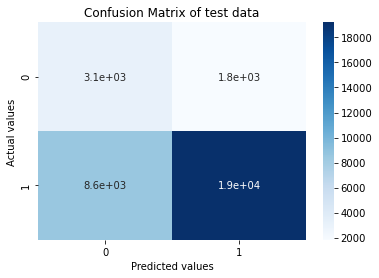

In [42]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
#https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor

cm0 = metrics.confusion_matrix(y_test, y_pred_class_test)
cm1 = metrics.confusion_matrix(y_train, y_pred_class_train)

ax= plt.subplot();
sns.heatmap(cm0, annot=True,cmap='Blues',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted values');ax.set_ylabel('Actual values'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix of test data');
ax.xaxis.set_ticklabels(['0','1']); 
ax.yaxis.set_ticklabels(['0','1']);
print(cm0)


[[ 8289  3290]
 [19222 45672]]


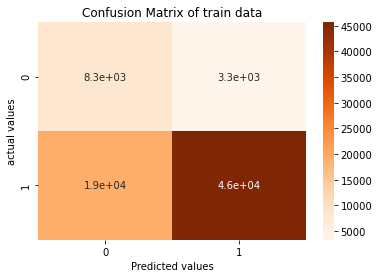

In [43]:
ax= plt.subplot();
sns.heatmap(cm1, annot=True,cmap='Oranges',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted values');ax.set_ylabel('actual values'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix of train data');
ax.xaxis.set_ticklabels(['0','1']); 
ax.yaxis.set_ticklabels(['0','1']);
print(cm1)

#### Set 2

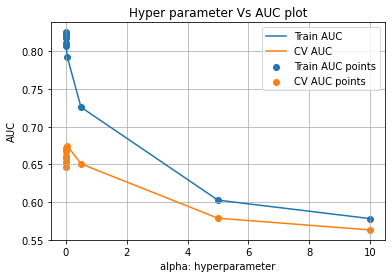

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
7,0.211100,0.004976,0.038897,8.143934e-04,0.00001,{'alpha': 1e-05},0.641758,0.648195,0.648237,0.646063,0.003044,8,0.822594,0.826018,0.827684,0.825432,0.002119
6,0.215420,0.002154,0.038898,4.899036e-07,0.0001,{'alpha': 0.0001},0.648613,0.654837,0.654501,0.652651,0.002858,6,0.819965,0.823474,0.825499,0.822979,0.002286
4,0.268613,0.015708,0.041887,2.431402e-06,0.0005,{'alpha': 0.0005},0.654719,0.660811,0.660382,0.658637,0.002776,5,0.816720,0.820287,0.822681,0.819896,0.002450
3,0.281915,0.021179,0.047533,4.095996e-03,0.001,{'alpha': 0.001},0.657599,0.663635,0.663294,0.661509,0.002768,4,0.814765,0.818359,0.820949,0.818025,0.002536
9,0.208440,0.008617,0.036570,4.019307e-03,0.005,{'alpha': 0.005},0.664337,0.670219,0.670625,0.668394,0.002873,3,0.808240,0.811855,0.815010,0.811702,0.002766
8,0.222072,0.002352,0.037234,1.695280e-03,0.01,{'alpha': 0.01},0.666925,0.672811,0.673682,0.671139,0.003001,2,0.804169,0.807747,0.811200,0.807705,0.002870
0,0.195476,0.010648,0.042886,8.144907e-04,0.05,{'alpha': 0.05},0.669683,0.675946,0.678604,0.674744,0.003740,1,0.788913,0.792102,0.796266,0.792427,0.003011
5,0.224066,0.011867,0.041223,3.290368e-03,0.5,{'alpha': 0.5},0.643273,0.651581,0.657362,0.650739,0.005783,7,0.725179,0.724488,0.728080,0.725916,0.001556
1,0.192816,0.003673,0.042553,1.244049e-03,5,{'alpha': 5},0.569709,0.581327,0.584682,0.578573,0.006415,9,0.606841,0.600539,0.600261,0.602547,0.003038
2,0.213761,0.037866,0.043884,3.551109e-03,10,{'alpha': 10},0.553714,0.566980,0.568400,0.563031,0.006614,10,0.583148,0.575587,0.575396,0.578044,0.003610


In [44]:
tfidf_tr = hstack((text_tfidf_tr,X_train_state,X_train_teacher,X_train_grade,X_train_categories,X_train_subcate,X_train_price_norm,X_train_num_norm)).tocsr()
tfidf_te = hstack((text_tfidf_te,X_test_state,X_test_teacher,X_test_grade,X_test_categories,X_test_subcate,X_test_price_norm,X_test_num_norm)).tocsr()

# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot

nb = MultinomialNB(class_prior=[0.5,0.5])
parameters = {'alpha':[ 0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10]}
clf = RandomizedSearchCV(nb, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(tfidf_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']

plt.plot(alpha, train_auc, label='Train AUC')
plt.plot(alpha, cv_auc, label='CV AUC')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results

14541 14541
test=  0.6367788251788968
train=  0.6966581930857327


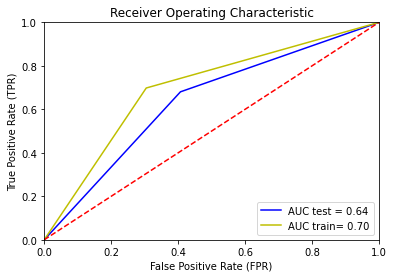

[2 1 0] [2 1 0]


In [45]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.
print(tfidf_te.shape[1],tfidf_tr.shape[1])
nb=MultinomialNB(alpha=0.05, class_prior=[0.5, 0.5], fit_prior=True)
nb.fit(tfidf_tr, y_train)
y_pred_class_test = nb.predict(tfidf_te)
print("test= ",metrics.roc_auc_score(y_test, y_pred_class_test))
fpr, tpr, th_tfidf = metrics.roc_curve(y_test, y_pred_class_test)
roc_auc_test = metrics.auc(fpr, tpr)

y_pred_class_train = nb.predict(tfidf_tr)
print("train= ",metrics.roc_auc_score(y_train, y_pred_class_train))
fpr_1, tpr_1, th_tfidf_1 = metrics.roc_curve(y_train, y_pred_class_train)
roc_auc_train = metrics.auc(fpr_1, tpr_1)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC test = %0.2f' % roc_auc_test)
plt.plot(fpr_1, tpr_1, 'y', label = 'AUC train= %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.show()

print(th_tfidf,th_tfidf_1)

In [ ]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.


[[ 2943  2020]
 [ 8884 18928]]


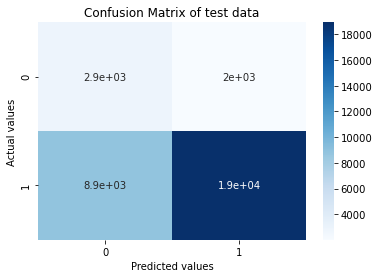

In [46]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
cm0 = metrics.confusion_matrix(y_test, y_pred_class_test)
cm1 = metrics.confusion_matrix(y_train, y_pred_class_train)

ax= plt.subplot();
sns.heatmap(cm0, annot=True,cmap='Blues',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted values');ax.set_ylabel('Actual values'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix of test data');
ax.xaxis.set_ticklabels(['0','1']); 
ax.yaxis.set_ticklabels(['0','1']);
print(cm0)

[[ 8050  3529]
 [19592 45302]]


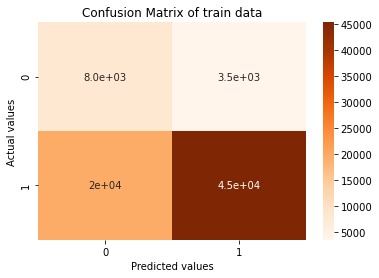

In [47]:
ax= plt.subplot();
sns.heatmap(cm1, annot=True,cmap='Oranges',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted values');ax.set_ylabel('Actual values'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix of train data');
ax.xaxis.set_ticklabels(['0','1']); 
ax.yaxis.set_ticklabels(['0','1']);
print(cm1)

In [50]:
# Either from set 1 (or) set 2, print the names of the top 20 features associated with the positive and negative classes each. (You have to print the names of the features, but not the indexes)
k=nb.feature_log_prob_
a=k[0,:]
b=k[1,:]
ind=[]
for i in range(20):                    #picking top feature
    index=np.where(a==np.max(a))
    a = np.delete(a, index)
    ind.append(index[0].tolist())      #removing other info(datatype)

list_w=words+w1+w2+w3+w4+w5            #adding all the features into 1 list in proper order
list_w.append("price")
list_w.append("teacher_number_of_previously_posted_projects")
a=k[0,:]
imp_f=[]
print(ind)
for i in ind:  
    if len(i)>0:
        for j in i:
               imp_f.append(list_w[j])
    #imp_f.append(list_w[i[0]])
    
print("This are the top 20 features:- ",imp_f[1:])

[[14539], [14539], [14493], [14503], [14498], [14502], [14493], [14494], [14520], [14521], [14520], [14494], [14500, 14525], [14497], [14444], [12443], [14493], [14497], [14492], [14490]]
This are the top 20 features:-  ['price', 'mrs', 'history_civics', 'grades_9_12', 'health_sports', 'mrs', 'ms', 'financialliteracy', 'foreignlanguages', 'financialliteracy', 'ms', 'appliedlearning', 'history_geography', 'grades_6_8', 'ca', 'students', 'mrs', 'grades_6_8', 'mr', 'wy']


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [51]:
# Summarize your assignment work here in a few points, and also compare the final models (from set 1 and set 2), in terms of optimal hyperparameter value 'alpha', training AUC and test AUC scores.
# You can either use a pretty table or any other tabular structure.
# Reference Link for Pretty table:  https://pypi.org/project/prettytable/
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper parameter","AUC"]
x.add_row(["BOW", "naive Bayes", 0.05, 0.6610])
x.add_row(["TFIDF", "naive Bayes", 0.5, 0.6367])
print(x)

+------------+-------------+-----------------+--------+
| Vectorizer |    Model    | Hyper parameter |  AUC   |
+------------+-------------+-----------------+--------+
|    BOW     | naive Bayes |       0.05      | 0.661  |
|   TFIDF    | naive Bayes |       0.5       | 0.6367 |
+------------+-------------+-----------------+--------+
